In [159]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import nbformat



from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [161]:
# Path of my CSV file
file_path = '.../6.3.3_spotify_5000_songs.csv'

# Use Pandas read_csv function to read the CSV file and store the data in a DataFrame
moosic_df = pd.read_csv(file_path)

In [162]:
# Display the names of the columns present in the DataFrame
print(moosic_df.columns)

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [163]:
# Remove extra spaces in column names
moosic_df.columns = moosic_df.columns.str.strip()

In [164]:
# Count how many missing values are there
missing_values = moosic_df.isna().sum()
missing_values

Unnamed: 0          0
name                0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
duration_ms         0
time_signature      0
id                  0
html                0
dtype: int64

In [165]:
# Add a new colums 'name_artist'
moosic_df['name_artist'] = moosic_df['name'] + ' - ' + moosic_df['artist']

In [166]:
moosic_df.head(2)

Unnamed: 0                                               name  \
0           0  Se Eu Quiser Falar Com Deus                   ...   
1           1  Saudade De Bahia                              ...   

                                             artist  danceability  energy  \
0  Gilberto Gil                                             0.658   0.259   
1  Antônio Carlos Jobim                                     0.742   0.399   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0   11   -13.141     0       0.0705         0.694          0.000059     0.975   
1    2   -12.646     1       0.0346         0.217          0.000002     0.107   

   valence    tempo   type  duration_ms  time_signature  \
0    0.306  110.376              256213               4   
1    0.693  125.039              191867               4   

                        id                                               html  \
0  1n7JnwviZ7zf0LR1tcGFq7   https://open.spotify.com/track/1n7JnwviZ7zf0LR...   
1  5QGM1U0eCYrQuwSJwTm5Zq   https://open.spotify.com/track/5QGM1U0eCYrQuwS...   

                                         name_artist  
0  Se Eu Quiser Falar Com Deus                   ...  
1  Saudade De Bahia                              ...

In [167]:
# Display the names of the columns present in the DataFrame
print(moosic_df.columns)

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html', 'name_artist'],
      dtype='object')


In [168]:
# Remove extra spaces in column names
moosic_df.columns = moosic_df.columns.str.strip()

In [169]:
# Add a new 'count' column with the repetition count
moosic_df['count_name_artist'] = moosic_df.groupby('name_artist')['name_artist'].transform('count')
moosic_df['count_id'] = moosic_df.groupby('id')['id'].transform('count')

In [170]:
# INFO
moosic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5235 non-null   int64  
 1   name               5235 non-null   object 
 2   artist             5235 non-null   object 
 3   danceability       5235 non-null   float64
 4   energy             5235 non-null   float64
 5   key                5235 non-null   int64  
 6   loudness           5235 non-null   float64
 7   mode               5235 non-null   int64  
 8   speechiness        5235 non-null   float64
 9   acousticness       5235 non-null   float64
 10  instrumentalness   5235 non-null   float64
 11  liveness           5235 non-null   float64
 12  valence            5235 non-null   float64
 13  tempo              5235 non-null   float64
 14  type               5235 non-null   object 
 15  duration_ms        5235 non-null   int64  
 16  time_signature     5235 

In [171]:
moosic_df.duplicated().sum()

0

In [172]:
pd.set_option('display.max_rows', None)

In [173]:
duplicates_mask = moosic_df.duplicated(subset=['id'], keep=False)

# Filter the DataFrame to show only duplicate rows
duplicated_rows = moosic_df[duplicates_mask]

In [174]:
# Delete duplicate rows based on "id"column
moosic_df_no_duplicates_id = moosic_df.drop_duplicates(subset=['id'], keep='first')


In [175]:
duplicates_mask_1 = moosic_df_no_duplicates_id.duplicated(subset=['name_artist'], keep=False)

# Filter the DataFrame to show only duplicate rows
duplicated_rows_1 = moosic_df_no_duplicates_id[duplicates_mask_1]


In [176]:
# Delete duplicate rows based on 'name_artist' column
final_moosic_df = moosic_df_no_duplicates_id.drop_duplicates(subset=['name_artist'], keep='first')

In [177]:
final_moosic_df.set_index("name_artist", inplace=True)


In [178]:
final_moosic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5114 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                       - Gilberto Gil                                     to Ravel: Boléro, M. 81                                                                                                                                                            - Maurice Ravel                                   
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5114 non-null   int64  
 1   name               5114 non-null   object 
 2   artist             5114 non-null   object 
 3   danceability       5114 non-null   float64
 4   energy             5114 non-null   float64
 5   key                5114 non-null   int64  
 6   loudness           5114 non-null   float64
 7   mode        

In [179]:
final_moosic_df.head(3)

Unnamed: 0  \
name_artist                                                      
Se Eu Quiser Falar Com Deus                    ...           0   
Saudade De Bahia                               ...           1   
Canta Canta, Minha Gente                       ...           2   

                                                                                                 name  \
name_artist                                                                                             
Se Eu Quiser Falar Com Deus                    ...  Se Eu Quiser Falar Com Deus                   ...   
Saudade De Bahia                               ...  Saudade De Bahia                              ...   
Canta Canta, Minha Gente                       ...  Canta Canta, Minha Gente                      ...   

                                                                                              artist  \
name_artist                                                                                            
Se Eu Quiser Falar Com Deus                    ...  Gilberto Gil                                       
Saudade De Bahia                               ...  Antônio Carlos Jobim                               
Canta Canta, Minha Gente                       ...  Martinho Da Vila                                   

                                                    danceability  energy  key  \
name_artist                                                                     
Se Eu Quiser Falar Com Deus                    ...         0.658   0.259   11   
Saudade De Bahia                               ...         0.742   0.399    2   
Canta Canta, Minha Gente                       ...         0.851   0.730    2   

                                                    loudness  mode  \
name_artist                                                          
Se Eu Quiser Falar Com Deus                    ...   -13.141     0   
Saudade De Bahia                               ...   -12.646     1   
Canta Canta, Minha Gente                       ...   -11.048     1   

                                                    speechiness  acousticness  \
name_artist                                                                     
Se Eu Quiser Falar Com Deus                    ...       0.0705         0.694   
Saudade De Bahia                               ...       0.0346         0.217   
Canta Canta, Minha Gente                       ...       0.3470         0.453   

                                                    ...  liveness  valence  \
name_artist                                         ...                      
Se Eu Quiser Falar Com Deus                    ...  ...     0.975    0.306   
Saudade De Bahia                               ...  ...     0.107    0.693   
Canta Canta, Minha Gente                       ...  ...     0.124    0.905   

                                                      tempo   type  \
name_artist                                                          
Se Eu Quiser Falar Com Deus                    ...  110.376          
Saudade De Bahia                               ...  125.039          
Canta Canta, Minha Gente                       ...   93.698          

                                                   duration_ms  \
name_artist                                                      
Se Eu Quiser Falar Com Deus                    ...      256213   
Saudade De Bahia                               ...      191867   
Canta Canta, Minha Gente                       ...      152267   

                                                    time_signature  \
name_artist                                                          
Se Eu Quiser Falar Com Deus                    ...               4   
Saudade De Bahia                               ...               4   
Canta Canta, Minha Gente                       ...               4   

                                                                         id  \
name_art

In [180]:
final_moosic_df=final_moosic_df.drop(['Unnamed: 0', "name", "artist", 'type', "id", "count_name_artist", "count_id","html"], axis=1)

In [181]:
final_moosic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5114 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                       - Gilberto Gil                                     to Ravel: Boléro, M. 81                                                                                                                                                            - Maurice Ravel                                   
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5114 non-null   float64
 1   energy            5114 non-null   float64
 2   key               5114 non-null   int64  
 3   loudness          5114 non-null   float64
 4   mode              5114 non-null   int64  
 5   speechiness       5114 non-null   float64
 6   acousticness      5114 non-null   float64
 7   instrumentalness  511

In [182]:
my_min_max = MinMaxScaler()
scaled_features_df = my_min_max.fit_transform(final_moosic_df)
scaled_features_df=pd.DataFrame(scaled_features_df, columns=final_moosic_df.columns, index=final_moosic_df.index)

In [183]:
scaled_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5114 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                       - Gilberto Gil                                     to Ravel: Boléro, M. 81                                                                                                                                                            - Maurice Ravel                                   
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5114 non-null   float64
 1   energy            5114 non-null   float64
 2   key               5114 non-null   float64
 3   loudness          5114 non-null   float64
 4   mode              5114 non-null   float64
 5   speechiness       5114 non-null   float64
 6   acousticness      5114 non-null   float64
 7   instrumentalness  511

In [184]:
scaled_features_df

danceability    energy  \
name_artist                                                                  
Se Eu Quiser Falar Com Deus                    ...      0.680455  0.259000   
Saudade De Bahia                               ...      0.767322  0.399000   
Canta Canta, Minha Gente                       ...      0.880041  0.730000   
Mulher Eu Sei                                  ...      0.729059  0.050200   
Rosa Morena                                    ...      0.673216  0.119000   
Desafinado                                     ...      0.481903  0.146000   
Madalena                                       ...      0.698035  0.207000   
O Meu Amor É Glòria                            ...      0.521200  0.733000   
Brigas Nunca Mais                              ...      0.717684  0.546000   
Previsao                                       ...      0.697001  0.864000   
The Girl From Ipanema                          ...      0.662875  0.140000   
Blue Bossa - Remastered                        ...      0.496381  0.433000   
Aqua De Coco                                   ...      0.780765  0.732000   
Samba de Verão                                 ...      0.720786  0.405000   
Mas Que Nada                                   ...      0.639090  0.539000   
Nova Bossa Nova                                ...      0.618407  0.739000   
Não Sei                                        ...      0.395036  0.086600   
A Força Que Nunca Seca (feat. Maria Bethânia)  ...      0.582213  0.112000   
Aquarela Do Brasil                             ...      0.437435  0.252000   
Brigas Nunca Mais                              ...      0.547053  0.276000   
Águas De Março                                 ...      0.660807  0.552000   
Aquarela Do Brasil                             ...      0.464323  0.145000   
Chega De Saudade                               ...      0.440538  0.245000   
Don't Stop the Carnival                        ...      0.497415  0.525000   
Rebel Rebel                                    ...      0.801448  0.206000   
Rosa Morena - Live At Carnegie Hall/1964       ...      0.547053  0.134000   
Karoliina Kaunis                               ...      0.778697  0.215000   
Brigas, Nunca Mais                             ...      0.512927  0.242000   
Aquarela Do Brasil                             ...      0.571872  0.550000   
Kaipuusamba                                    ...      0.560496  0.224000   
Batida Diferente                               ...      0.625646  0.485000   
Team Zissou                                    ...      0.640124  0.402000   
Parabens                                       ...      0.762151  0.802000   
O Amor Em Paz                                  ...      0.705274  0.281000   
Once Again                                     ...      0.644261  0.331000   
Mariana                                        ...      0.859359  0.430000   
Mariana                                        ...      0.638056  0.526000   
Carnaval Inesquecível Na Cidade Alta           ...      0.771458  0.557000   
Garota De Ipanema                              ...      0.754912  0.145000   
Corcovado - Remastered                         ...      0.797311  0.278000   
O Pato (The Duck) - Live At Carnegie Hall/1964 ...      0.642192  0.180000   
August Day Song                                ...      0.742503  0.294000   
Os Grilos                                      ...      0.592554  0.805000   
Saudade Fez Um Samba                           ...      0.730093  0.303000   
OBI                                            ...      0.585315  0.314000   
Mas Que Nada                                   ...      0.521200  0.566000   
Laia Ladia                                     ...      0.400207  0.469000   
Triste                                         ...      0.630817  0.340000   
Só Danço Samba                                 ...      0.631851  0.279000   
Samba Triste                                   ...      0.658738  0.190000

# Elbow and Silhouette Methods 

/Users/tsveti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



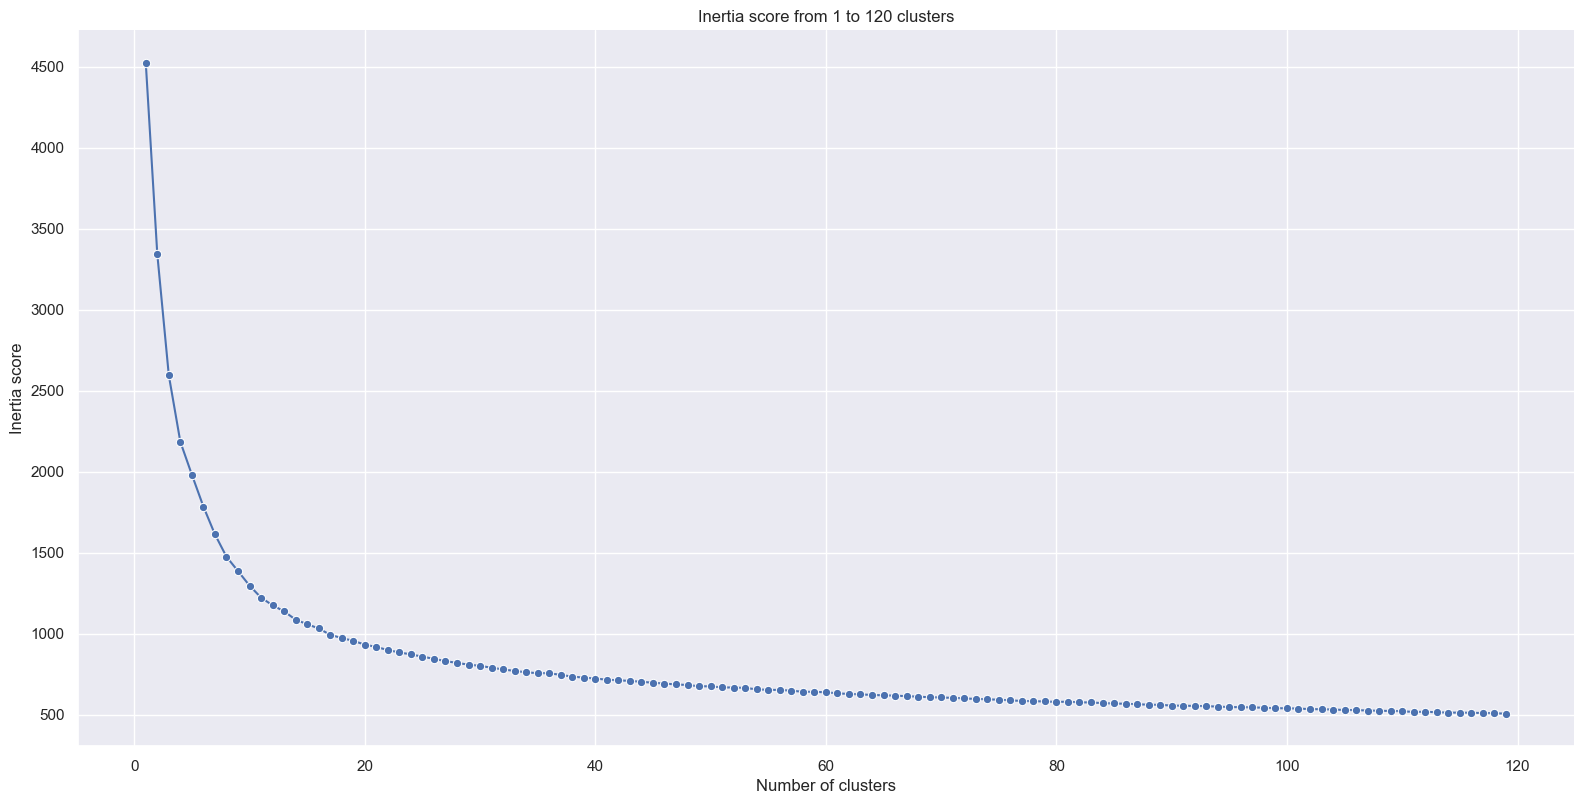

In [185]:
# ELBOW METHOD- 120 CLUSTERS
seed = 123
max_k = 120

inertia_list = []

for i in range(1, max_k):

    myKMeans = KMeans(n_clusters=i,
                      n_init=10,
                      random_state = seed)

    myKMeans.fit(scaled_features_df)

    inertia_list.append(myKMeans.inertia_)

sns.set_theme(style='darkgrid')

(

sns.relplot(y = inertia_list,
            x = range(1,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Inertia score from 1 to {max_k} clusters")
.set_axis_labels("Number of clusters", "Inertia score")
);

/Users/tsveti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



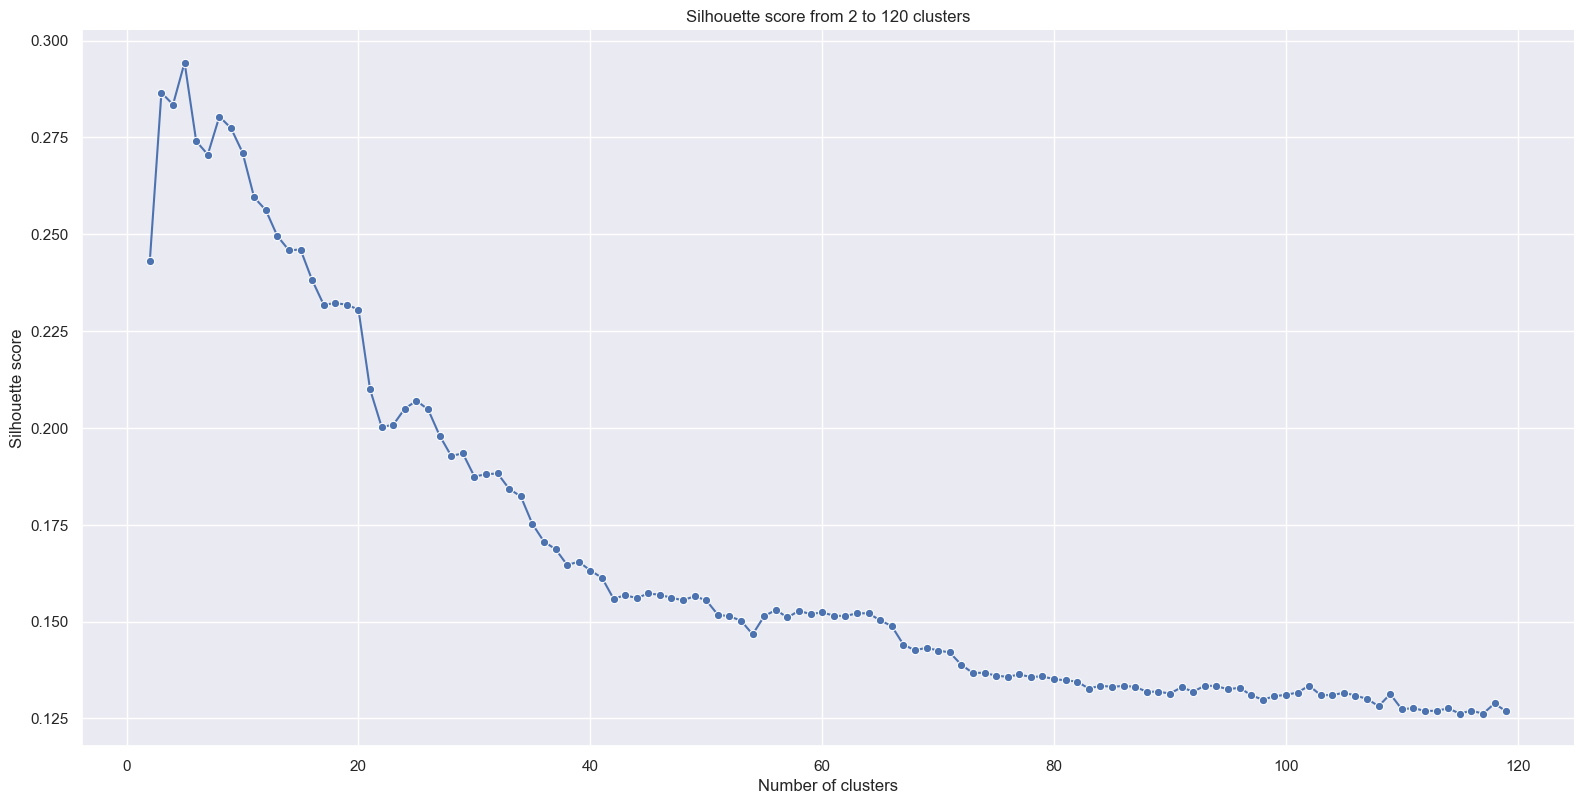

In [186]:
# SILHOUETTE - 120 CLUSTERS
max_k = 120

sil_scores = []


for j in range(2, max_k):

    kmeans = KMeans(n_clusters=j,
                    n_init="auto",
                    random_state = seed)

    kmeans.fit(scaled_features_df)

    labels = kmeans.labels_

    score = silhouette_score(scaled_features_df, labels)

    sil_scores.append(score)
sns.set_theme(style='darkgrid')

(
sns.relplot(y=sil_scores,
            x=range(2,max_k),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from 2 to {max_k} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

# Cluster with KMeans

In [187]:

n_clusters = 20
my_kmeans = KMeans(n_clusters=n_clusters,
                   n_init=10,
                   random_state = 123)

my_kmeans.fit(scaled_features_df)

clusters = my_kmeans.labels_
scaled_features_df["cluster"] = clusters

In [188]:
scaled_features_df.head(5)

danceability  energy  \
name_artist                                                                
Se Eu Quiser Falar Com Deus                    ...      0.680455  0.2590   
Saudade De Bahia                               ...      0.767322  0.3990   
Canta Canta, Minha Gente                       ...      0.880041  0.7300   
Mulher Eu Sei                                  ...      0.729059  0.0502   
Rosa Morena                                    ...      0.673216  0.1190   

                                                         key  loudness  mode  \
name_artist                                                                    
Se Eu Quiser Falar Com Deus                    ...  1.000000  0.763897   0.0   
Saudade De Bahia                               ...  0.181818  0.771967   1.0   
Canta Canta, Minha Gente                       ...  0.181818  0.798018   1.0   
Mulher Eu Sei                                  ...  0.363636  0.682811   1.0   
Rosa Morena                                    ...  0.545455  0.655228   1.0   

                                                    speechiness  acousticness  \
name_artist                                                                     
Se Eu Quiser Falar Com Deus                    ...     0.076797      0.696787   
Saudade De Bahia                               ...     0.037691      0.217871   
Canta Canta, Minha Gente                       ...     0.377996      0.454819   
Mulher Eu Sei                                  ...     0.051307      0.882530   
Rosa Morena                                    ...     0.041394      0.919679   

                                                    instrumentalness  \
name_artist                                                            
Se Eu Quiser Falar Com Deus                    ...          0.000060   
Saudade De Bahia                               ...          0.000002   
Canta Canta, Minha Gente                       ...          0.000064   
Mulher Eu Sei                                  ...          0.000041   
Rosa Morena                                    ...          0.000348   

                                                    liveness   valence  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ...  0.987842  0.310660   
Saudade De Bahia                               ...  0.108409  0.703553   
Canta Canta, Minha Gente                       ...  0.125633  0.918782   
Mulher Eu Sei                                  ...  0.391084  0.531980   
Rosa Morena                                    ...  0.105370  0.408122   

                                                       tempo  duration_ms  \
name_artist                                                                 
Se Eu Quiser Falar Com Deus                    ...  0.515800     0.059067   
Saudade De Bahia                               ...  0.584322     0.042058   
Canta Canta, Minha Gente                       ...  0.437862     0.031590   
Mulher Eu Sei                                  ...  0.499098     0.040567   
Rosa Morena                                    ...  0.565171     0.063684   

                                                    time_signature  cluster  
name_artist                                                                  
Se Eu Quiser Falar Com Deus                    ...             0.8        6  
Saudade De Bahia                               ...             0.8        5  
Canta Canta, Minha Gente                       ...             0.8       18  
Mulher Eu Sei                                  ...             0.8       16  
Rosa Morena                                    ...             0.8        3

In [189]:
scaled_features_df.sample(5)

danceability   energy  \
name_artist                                                                 
Track3a (2waynice)                             ...      0.304033  0.00002   
Writer's Block (feat. Eminem)                  ...      0.474664  0.70500   
Lakmé / Act 1: Viens, Mallika, ... Dôme épais (...      0.248190  0.14200   
Sonata in A Minor, K.109: Adagio               ...      0.468459  0.03850   
Manon Lescaut / Act 2: "In quelle trine morbide...      0.187177  0.11400   

                                                         key  loudness  mode  \
name_artist                                                                    
Track3a (2waynice)                             ...  0.363636  0.449839   1.0   
Writer's Block (feat. Eminem)                  ...  0.000000  0.881093   1.0   
Lakmé / Act 1: Viens, Mallika, ... Dôme épais (...  1.000000  0.646246   1.0   
Sonata in A Minor, K.109: Adagio               ...  0.818182  0.519628   0.0   
Manon Lescaut / Act 2: "In quelle trine morbide...  0.909091  0.693342   0.0   

                                                    speechiness  acousticness  \
name_artist                                                                     
Track3a (2waynice)                             ...     0.100980      0.993976   
Writer's Block (feat. Eminem)                  ...     0.137255      0.000411   
Lakmé / Act 1: Viens, Mallika, ... Dôme épais (...     0.062418      0.976908   
Sonata in A Minor, K.109: Adagio               ...     0.042702      0.998996   
Manon Lescaut / Act 2: "In quelle trine morbide...     0.054575      0.990964   

                                                    instrumentalness  \
name_artist                                                            
Track3a (2waynice)                             ...          0.132995   
Writer's Block (feat. Eminem)                  ...          0.000002   
Lakmé / Act 1: Viens, Mallika, ... Dôme épais (...          0.000021   
Sonata in A Minor, K.109: Adagio               ...          0.921827   
Manon Lescaut / Act 2: "In quelle trine morbide...          0.079086   

                                                    liveness   valence  \
name_artist                                                              
Track3a (2waynice)                             ...  0.082776  0.824365   
Writer's Block (feat. Eminem)                  ...  0.312057  0.209137   
Lakmé / Act 1: Viens, Mallika, ... Dôme épais (...  0.903749  0.042234   
Sonata in A Minor, K.109: Adagio               ...  0.080750  0.157360   
Manon Lescaut / Act 2: "In quelle trine morbide...  0.101317  0.038883   

                                                       tempo  duration_ms  \
name_artist                                                                 
Track3a (2waynice)                             ...  0.323160     0.078791   
Writer's Block (feat. Eminem)                  ...  0.734670     0.063679   
Lakmé / Act 1: Viens, Mallika, ... Dôme épais (...  0.375027     0.097957   
Sonata in A Minor, K.109: Adagio               ...  0.456479     0.047694   
Manon Lescaut / Act 2: "In quelle trine morbide...  0.785691     0.035693   

                                                    time_signature  cluster  
name_artist                                                                  
Track3a (2waynice)                             ...             0.6       16  
Writer's Block (feat. Eminem)                  ...             0.8       19  
Lakmé / Act 1: Viens, Mallika, ... Dôme épais (...             0.8        3  
Sonata in A Minor, K.109: Adagio               ...             0.8       15  
Manon Lescaut / Act 2: "In quelle trine morbide...             0.8        6

## Cluster analysis - centroids

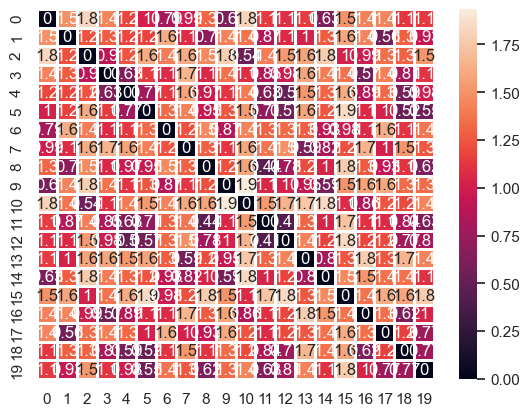

In [190]:

centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

## Radar Chart

In [191]:
# State the label for each arm of the chart
categories = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

trace_objects = []

for cluster in sorted(scaled_features_df['cluster'].unique()):
  cluster_food_means = go.Scatterpolar(
    r=[scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'danceability'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'energy'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'key'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'loudness'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'mode'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'speechiness'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'acousticness'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'instrumentalness'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'liveness'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'valence'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'tempo'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'duration_ms'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'time_signature'].mean()],
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(cluster_food_means)

fig = go.Figure()
fig.add_traces(trace_objects)

fig.update_layout(
  title_text = 'Radar chart of mean cluster preferences by cluster',
  height = 600,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

# Principal Component Analysis (PCA)

In [126]:
final_moosic_df.head(3)

danceability  energy  key  \
name_artist                                                                     
Se Eu Quiser Falar Com Deus                    ...         0.658   0.259   11   
Saudade De Bahia                               ...         0.742   0.399    2   
Canta Canta, Minha Gente                       ...         0.851   0.730    2   

                                                    loudness  mode  \
name_artist                                                          
Se Eu Quiser Falar Com Deus                    ...   -13.141     0   
Saudade De Bahia                               ...   -12.646     1   
Canta Canta, Minha Gente                       ...   -11.048     1   

                                                    speechiness  acousticness  \
name_artist                                                                     
Se Eu Quiser Falar Com Deus                    ...       0.0705         0.694   
Saudade De Bahia                               ...       0.0346         0.217   
Canta Canta, Minha Gente                       ...       0.3470         0.453   

                                                    instrumentalness  \
name_artist                                                            
Se Eu Quiser Falar Com Deus                    ...          0.000059   
Saudade De Bahia                               ...          0.000002   
Canta Canta, Minha Gente                       ...          0.000063   

                                                    liveness  valence  \
name_artist                                                             
Se Eu Quiser Falar Com Deus                    ...     0.975    0.306   
Saudade De Bahia                               ...     0.107    0.693   
Canta Canta, Minha Gente                       ...     0.124    0.905   

                                                      tempo  duration_ms  \
name_artist                                                                
Se Eu Quiser Falar Com Deus                    ...  110.376       256213   
Saudade De Bahia                               ...  125.039       191867   
Canta Canta, Minha Gente                       ...   93.698       152267   

                                                    time_signature  
name_artist                                                         
Se Eu Quiser Falar Com Deus                    ...               4  
Saudade De Bahia                               ...               4  
Canta Canta, Minha Gente                       ...               4

In [127]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()

scaled_pca = my_min_max.fit_transform(final_moosic_df)
scaled_pca=pd.DataFrame(scaled_pca, columns=final_moosic_df.columns, index=final_moosic_df.index)

In [129]:
scaled_pca.head(3)

danceability  energy  \
name_artist                                                                
Se Eu Quiser Falar Com Deus                    ...      0.680455   0.259   
Saudade De Bahia                               ...      0.767322   0.399   
Canta Canta, Minha Gente                       ...      0.880041   0.730   

                                                         key  loudness  mode  \
name_artist                                                                    
Se Eu Quiser Falar Com Deus                    ...  1.000000  0.763897   0.0   
Saudade De Bahia                               ...  0.181818  0.771967   1.0   
Canta Canta, Minha Gente                       ...  0.181818  0.798018   1.0   

                                                    speechiness  acousticness  \
name_artist                                                                     
Se Eu Quiser Falar Com Deus                    ...     0.076797      0.696787   
Saudade De Bahia                               ...     0.037691      0.217871   
Canta Canta, Minha Gente                       ...     0.377996      0.454819   

                                                    instrumentalness  \
name_artist                                                            
Se Eu Quiser Falar Com Deus                    ...          0.000060   
Saudade De Bahia                               ...          0.000002   
Canta Canta, Minha Gente                       ...          0.000064   

                                                    liveness   valence  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ...  0.987842  0.310660   
Saudade De Bahia                               ...  0.108409  0.703553   
Canta Canta, Minha Gente                       ...  0.125633  0.918782   

                                                       tempo  duration_ms  \
name_artist                                                                 
Se Eu Quiser Falar Com Deus                    ...  0.515800     0.059067   
Saudade De Bahia                               ...  0.584322     0.042058   
Canta Canta, Minha Gente                       ...  0.437862     0.031590   

                                                    time_signature  
name_artist                                                         
Se Eu Quiser Falar Com Deus                    ...             0.8  
Saudade De Bahia                               ...             0.8  
Canta Canta, Minha Gente                       ...             0.8

## Baseline model

In [131]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 20, 
                   n_init=10,
                   random_state = 123)

my_kmeans.fit(scaled_pca)
clusters = my_kmeans.predict(scaled_pca)

# Attach the cluster output to a new DataFrame
clusters_df = pd.DataFrame(index=scaled_pca.index,
                           data={"Base model": clusters})


## PCA

In [139]:
# Initialise the PCA object
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(scaled_pca)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(scaled_pca)

pca_basic_df=pd.DataFrame(pca_basic_df, columns=scaled_pca.columns, index=scaled_pca.index)

In [141]:
pca_basic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5114 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                       - Gilberto Gil                                     to Ravel: Boléro, M. 81                                                                                                                                                            - Maurice Ravel                                   
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5114 non-null   float64
 1   energy            5114 non-null   float64
 2   key               5114 non-null   float64
 3   loudness          5114 non-null   float64
 4   mode              5114 non-null   float64
 5   speechiness       5114 non-null   float64
 6   acousticness      5114 non-null   float64
 7   instrumentalness  511

## Identifying the most informative principal components

In [142]:
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.27948734, 0.26104909, 0.18466074, 0.11375255, 0.06083312,
       0.02761468, 0.02269717, 0.01776467, 0.01494553, 0.00741075,
       0.00590256, 0.0025252 , 0.0013566 ])

###   Elbow method

/Users/tsveti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



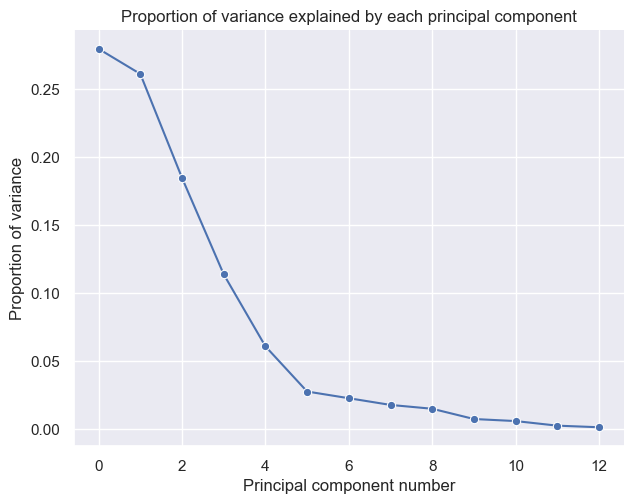

In [143]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

# Add a column for the principal component index
explained_variance_array_df["Principal component index"] = range(len(explained_variance_array))

(
# Create a line chart with sns.relplot
sns.relplot(
    kind='line',
    data=explained_variance_array_df,
    x="Principal component index",
    y="Variance explained",
    marker='o',
    aspect=1.3)
# Set the title of the plot
.set(title="Proportion of variance explained by each principal component")
# Set the axis labels
.set_axis_labels("Principal component number", "Proportion of variance")
);

In [150]:
elbow = 10
pca_elbow = PCA(n_components=elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(pca_basic_df)

pca_elbow_df=pd.DataFrame(pca_elbow_df)

In [152]:
pca_elbow_df.head(3)

0         1         2         3         4         5         6   \
0 -0.064537  0.758072 -0.517235  0.434502 -0.251413  0.565616  0.548255   
1 -0.037953 -0.455957 -0.383397 -0.227133  0.084413 -0.173156  0.039868   
2 -0.148934 -0.502758 -0.470304 -0.234399  0.277046 -0.010301  0.040500   

         7         8         9         10  
0  0.196826  0.107165 -0.021090 -0.013466  
1  0.109775  0.177213 -0.012999 -0.016394  
2 -0.138332 -0.166942  0.022379  0.288548

In [155]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 20,
                   n_init="auto",
                   random_state = 123)


my_kmeans.fit(pca_elbow_df)


clusters = my_kmeans.predict(pca_elbow_df)

clusters_df[f"PCA - {elbow}"] = clusters

clusters_df.head(3)

Base model  PCA - 10
name_artist                                                             
Se Eu Quiser Falar Com Deus                    ...           6         9
Saudade De Bahia                               ...           5         1
Canta Canta, Minha Gente                       ...          18         1

In [157]:
pca_elbow.components_

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00, -2.16493490e-15,
        -4.92661467e-16, -5.27355937e-16,  1.94289029e-16,
        -1.38777878e-16, -6.33174069e-17, -2.22044605e-16,
         1.17961196e-16,  2.84494650e-16, -2.08166817e-16,
        -5.20417043e-17],
       [-0.00000000e+00,  2.22044605e-15,  1.00000000e+00,
        -1.54390389e-16, -2.35922393e-16,  1.17961196e-16,
        -6.93889390e-17, -2.14672030e-16, -2.08166817e-17,
         1.63064007e-16, -1.04083409e-17,  2.11636264e-16,
         1.95156391e-17],
       [ 0.00000000e+00,  3.95516953e-16, -3.98986399e-17,
         1.00000000e+00,  1.37129891e-15,  6.08020578e-16,
        -1.06685494e-16,  7.56502066e-17,  2.81025203e-16,
         5.20417043e-17, -1.83880688e

###  Cumulative explained variance

/Users/tsveti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



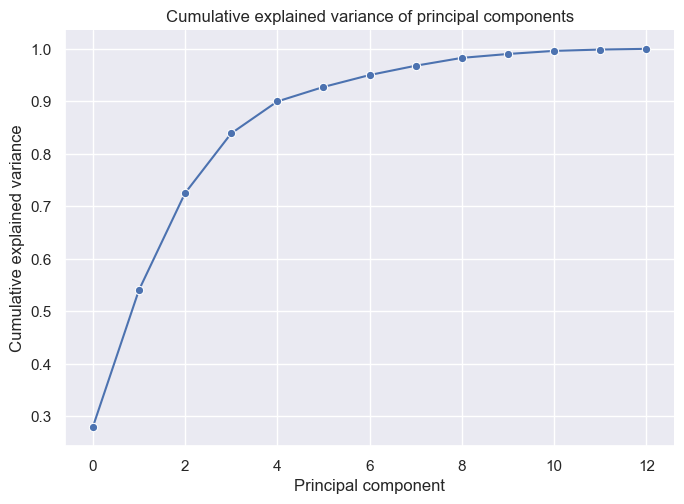

In [158]:
(

sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance_array)),  
    y=np.cumsum(explained_variance_array),  
    marker="o",  
    aspect=1.4,  
)
.set(title="Cumulative explained variance of principal components")

.set_axis_labels("Principal component", "Cumulative explained variance")
);

## Create a Spotify API app that connects Jupiternote with the platform

In [ ]:
!import spotipy
!import pickle
!from spotipy.oauth2 import SpotifyOAuth

In [ ]:
scope = ''
username = ''
redirectUri = 'URI_MUST_MATCH_THAT_SET_IN_APP_CREATION'
client_id = 'YOUR_APPS_CLIENT_ID'
client_secret = 'YOUR_APP_CLIENT_SECRET'

token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     #open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)

In [ ]:
playlist_collection = {}
for i in range(n_clusters):  # This range must match the number of clusters
    playlist_name = f'my_playlist_cluster_{i}'  # Here, we will create simple playlist names indicating which cluster created the playlist
    playlist_description= 'this is a test list'
    playlist_id = spotifyObject.user_playlist_create(user=username,
                                                     name=playlist_name,
                                                     public=True,
                                                     description=playlist_description)['id']
    id_list = list(songs_df.loc[songs_df["cluster"] == i]
                            .sample(5)  # Here, we simply take 5 songs randomly from each cluster
                            .id
                   )
     # Spotify needs cetain text wrappers around ID numbers to identify the target as a track, a playlist, etc.
    uris = [f'spotify:track:{str(id).strip()}' for id in id_list]
    spotifyObject.user_playlist_add_tracks(user=username,playlist_id=playlist_id,tracks=uris)
    playlist_collection[playlist_name] = playlist_id

    # Playlist IDs can be saved for later
with open("./playlists.pkl", "wb") as f:
    pickle.dump(playlist_collection, f)

# This step is only needed in Google Colab
from google.colab import files
files.download("./playlists.pkl")
token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)
with open("./playlists.pkl", "rb") as f:
    playlist_collection = pickle.load(f)
uris = [f'spotify:track:{str(id).strip()}' for id in songs_df.sample(10).id]
playlist_id = playlist_collection["my_playlist_cluster_0"] # We now replace the 5 songs in playlist 0 with 10 different songs
spotifyObject.user_playlist_replace_tracks(user=username, playlist_id=playlist_id, tracks=uris)